In [68]:
## Miniproject Chocolate
## Import libraries
import pandas as pd
import numpy as np

In [230]:
## load data
df = pd.read_csv("Datasets/flavors_of_cacao.csv")
df.describe()

df.dropna() ## drop missing values


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [159]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [97]:
## STEP3: Explore Datasets
   
res_tuples = df.groupby(list(df.columns)).size()
tuple_num = len(res_tuples)  # Tuples in df: 1793

CompaniesNum = len(pd.unique(df.iloc[:,0]))

Reviews2013 = len(df[df.iloc[:,3] == 2013])

Beantype_missing = df.iloc[:,7].str.isspace().sum()


NameError: name 'Beantype_missing' is not defined

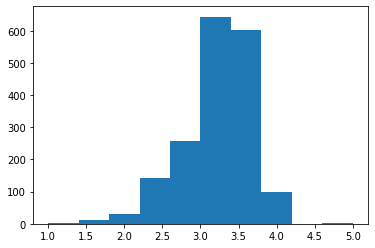

TypeError: 'method' object is not subscriptable

In [160]:
###STEP4: Visualization
import matplotlib.pyplot as plt

    ## Histogram
plt.hist(df['Rating'])
plt.show()

    ## Comment on figure: 
        #Most of the ratings fall between 3 to 3.7. 
        #Around 100 are rated higher then that and more then 500 are lower then that.

    #Convert and Visualize.
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.rstrip('%').astype('float') / 100.0

#### Step5 Visualise

plt.scatter(df['Cocoa\nPercent'],df['Rating'], alpha=0.1)
plt.xlabel("Cocoa\nPercent")
plt.ylabel("Rating")
plt.show()

    ## More cocoa in a bar does not correspond to higher rating

In [183]:
# Step6: Normalize : Rating columns
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df[['scaled_Rating']] =scaler.fit_transform(df[['Rating']])
print(df['scaled_Rating'])

0       0.6875
1       0.4375
2       0.5000
3       0.6250
4       0.6250
         ...  
1790    0.6875
1791    0.5000
1792    0.6250
1793    0.5625
1794    0.5000
Name: scaled_Rating, Length: 1795, dtype: float64


In [182]:
#Step7: Group by company and order 
ordered = df.groupby(df.iloc[:,0]).mean().sort_values("scaled_Rating")

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,scaled_Rating
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,0.6875
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,0.4375
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,0.5000
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,0.6250
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,0.6250
...,...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru,0.6875
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo,0.5000
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India,0.6250
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India,0.5625


In [237]:
## Step8: Encoding
## I am using ordinal (eventhough there is no order; as these are not label features.)
df.columns = df.columns.str.replace('\s+|\n|\(.*\)', '_')

from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()
df[['Company__' , 'Company_Location']]= encoder.fit_transform(df[['Company__' , 'Company_Location']])
df



,Company__,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,0.0,Agua Grande,1876,2016,63%,18.0,3.75,,Sao Tome
1,0.0,Kpime,1676,2015,70%,18.0,2.75,,Togo
2,0.0,Atsane,1676,2015,70%,18.0,3.00,,Togo
3,0.0,Akata,1680,2015,70%,18.0,3.50,,Togo
4,0.0,Quilla,1704,2015,70%,18.0,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,410.0,Peru,647,2011,70%,3.0,3.75,,Peru
1791,410.0,Congo,749,2011,65%,3.0,3.00,Forastero,Congo
1792,410.0,Kerala State,749,2011,65%,3.0,3.50,Forastero,India
1793,410.0,Kerala State,781,2011,62%,3.0,3.25,,India


Index(['Company__', 'Specific_Bean_Origin_or_Bar_Name', 'REF', 'Review_Date',
       'Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type',
       'Broad_Bean_Origin'],
      dtype='object')

'Company _(Maker-if_known)'